In [55]:
%matplotlib inline
import os
os.chdir('U:\\GitHubClones\\SALTSeniorDesign')
os.getcwd()
#import Excel
import xlwings as xw
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import re
from datetime import datetime

In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
wb = xw.Book('Salt.xlsm')
setup = wb.sheets('Setup')
output = wb.sheets('Output')
strats = wb.sheets('Strat Tables')
performance = wb.sheets('Performance')

# Path For the Current deal that is selected based on Setup
directory = setup['Setup.Directory'].value
shelf = setup['Setup.Shelf'].value
deal = setup['Setup.Deal'].value
report = setup['Setup.Report'].value
num_Deals = setup['Setup.Num_Deals'].value
max_Report = setup['Setup.Max_Report_Num'].value

In [4]:
tapes = np.array(setup['Tapes'].value)
tapes = tapes[0:int(max_Report),0:int(num_Deals)]
dfTapes = pd.DataFrame(data=tapes[1:,1:], columns=tapes[0,1:])
dfTapes.head()

,AMCAR 2017-1,AMCAR 2017-2,AMCAR 2017-3,SDART 2017-1,SDART 2017-2,SDART 2017-3
0,2017\01 January\2017.03.23_AmeriCredit Automob...,2017\03 March\2017.05.02_AmeriCredit Automobil...,2017\06 June\2017.07.01_AmeriCredit Automobile...,2017\01 January\2017.02.15_Santander Drive Aut...,2017\04 April\2017.05.18_Santander Drive Auto ...,2017\08 August\2017.09.07_Santander Drive Auto...
1,2017\02 February\2017.03.23_AmeriCredit Automo...,2017\04 April\2017.06.23_AmeriCredit Automobil...,2017\07 July\2017.08.25_AmeriCredit Automobile...,2017\02 February\2017.03.15_Santander Drive Au...,2017\05 May\2017.06.15_Santander Drive Auto Re...,2017\09 September\2017.10.16_Santander Drive A...
2,2017\03 March\2017.04.24_AmeriCredit Automobil...,2017\05 May\2017.07.24_AmeriCredit Automobile ...,2017\08 August\2017.09.25_AmeriCredit Automobi...,2017\03 March\2017.04.17_Santander Drive Auto ...,2017\06 June\2017.07.17_Santander Drive Auto R...,None
3,2017\04 April\2017.05.23_AmeriCredit Automobil...,2017\06 June\2017.08.23_AmeriCredit Automobile...,None,2017\04 April\2017.05.15_Santander Drive Auto ...,2017\07 July\2017.08.15_Santander Drive Auto R...,None
4,2017\05 May\2017.06.23_AmeriCredit Automobile ...,2017\08 August\2017.09.25_AmeriCredit Automobi...,None,2017\05 May\2017.06.15_Santander Drive Auto Re...,2017\08 August\2017.09.15_Santander Drive Auto...,None


In [5]:
path = directory + '\\' + shelf + '\\' + deal + '\\' + dfTapes[deal][0]

In [6]:
dfTapes[deal]

0    2017\01 January\2017.02.15_Santander Drive Aut...
1    2017\02 February\2017.03.15_Santander Drive Au...
2    2017\03 March\2017.04.17_Santander Drive Auto ...
3    2017\04 April\2017.05.15_Santander Drive Auto ...
4    2017\05 May\2017.06.15_Santander Drive Auto Re...
5    2017\06 June\2017.07.17_Santander Drive Auto R...
6    2017\07 July\2017.08.15_Santander Drive Auto R...
7    2017\08 August\2017.09.15_Santander Drive Auto...
Name: SDART 2017-1, dtype: object

In [7]:
df = pd.read_csv(path, memory_map=True, low_memory=False)
df.head()

,assetTypeNumber,assetNumber,reportingPeriodBeginningDate,reportingPeriodEndingDate,originatorName,originationDate,originalLoanAmount,originalLoanTerm,loanMaturityDate,originalInterestRatePercentage,interestCalculationTypeCode,originalInterestRateTypeCode,originalInterestOnlyTermNumber,originalFirstPaymentDate,underwritingIndicator,gracePeriodNumber,paymentTypeCode,subvented,vehicleManufacturerName,vehicleModelName,vehicleNewUsedCode,vehicleModelYear,vehicleTypeCode,vehicleValueAmount,vehicleValueSourceCode,obligorCreditScoreType,obligorCreditScore,obligorIncomeVerificationLevelCode,obligorEmploymentVerificationCode,coObligorIndicator,paymentToIncomePercentage,obligorGeographicLocation,assetAddedIndicator,remainingTermToMaturityNumber,reportingPeriodModificationIndicator,servicingAdvanceMethodCode,reportingPeriodBeginningLoanBalanceAmount,nextReportingPeriodPaymentAmountDue,reportingPeriodInterestRatePercentage,nextInterestRatePercentage,servicingFeePercentage,servicingFlatFeeAmount,otherServicerFeeRetainedByServicer,otherAssessedUncollectedServicerFeeAmount,scheduledInterestAmount,scheduledPrincipalAmount,otherPrincipalAdjustmentAmount,reportingPeriodActualEndBalanceAmount,reportingPeriodScheduledPaymentAmount,totalActualAmountPaid,actualInterestCollectedAmount,actualPrincipalCollectedAmount,actualOtherCollectedAmount,servicerAdvancedAmount,interestPaidThroughDate,zeroBalanceEffectiveDate,zeroBalanceCode,currentDelinquencyStatus,primaryLoanServicerName,mostRecentServicingTransferReceivedDate,assetSubjectDemandIndicator,assetSubjectDemandStatusCode,repurchaseAmount,DemandResolutionDate,repurchaserName,repurchaseReplacementReasonCode,chargedoffPrincipalAmount,recoveredAmount,modificationTypeCode,paymentExtendedNumber,repossessedIndicator,repossessedProceedsAmount
0,SC,"=""6345119""",01-01-2017,01-31-2017,SC,10/2013,23260.03,60,01/2019,0.1194,1,1,-,12/2013,True,2,2,0,CHEVROLET TRUCK,Traverse,2,2010,3,17589.00,98,Bureau,671,3,2,False,0.187788,AZ,-,25,False,1,11977.51,512.31,0.1194,0.1194,0.0,-,-,50.59,103.1772,413.5228,0.0,11607.02,516.70,519.25,148.76,370.49,0.0,-,01-27-2017,-,-,0,SC,-,False,-,-,-,-,-,0.0,0.0,-,0,False,-
1,SC,"=""634535""",01-01-2017,01-31-2017,SC,03/2012,12031.00,72,03/2018,0.1800,1,1,-,04/2012,True,1,2,0,MAZDA,Mazda3,2,2010,1,13575.00,98,Bureau,-,2,2,False,0.069108,TX,-,15,False,1,3658.90,284.44,0.1800,0.1800,0.0,-,-,0.00,53.2969,221.1031,0.0,3439.80,274.40,275.00,55.90,219.10,0.0,-,01-24-2017,-,-,0,SC,-,False,-,-,-,-,-,0.0,0.0,-,0,False,-
2,SC,"=""6345360""",01-01-2017,01-31-2017,SC,11/2013,21332.31,72,11/2019,0.1810,1,1,-,12/2013,True,1,2,0,DODGE TRUCK,Grand Caravan,2,2010,1,15209.00,3,Bureau,560,2,2,False,0.109852,WA,-,35,False,1,14132.08,1317.82,0.1810,0.1810,0.0,-,-,0.00,196.7817,290.9683,0.0,13850.49,487.75,491.37,209.78,281.59,0.0,-,01-07-2017,-,-,0,SC,-,False,-,-,-,-,-,0.0,0.0,-,0,False,-
3,SC,"=""6345391""",01-01-2017,01-31-2017,SC,11/2013,24544.23,72,11/2019,0.0855,1,1,-,12/2013,True,1,2,0,TOYOTA,Sienna,2,2006,1,16550.00,98,Bureau,712,2,2,False,0.007974,FL,-,35,False,1,13122.36,538.38,0.0855,0.0855,0.0,-,-,0.00,96.1377,340.8223,0.0,13122.36,436.96,0.00,0.00,0.00,0.0,-,12-30-2016,-,-,0,SC,-,False,-,-,-,-,-,0.0,0.0,-,0,False,-
4,SC,"=""634551""",01-01-2017,01-31-2017,SC,03/2012,23589.10,72,09/2018,0.1710,1,1,-,04/2012,True,1,2,0,CHEVROLET,Sonic,1,2012,1,16607.31,98,Bureau,631,3,3,False,0.074936,IL,-,21,False,1,10510.59,1210.41,0.1710,0.1710,0.0,-,-,78.09,97.8123,428.2677,0.0,10510.59,526.08,0.00,0.00,0.00,0.0,-,10-07-2016,-,-,3,SC,-,False,-,-,-,-,-,0.0,0.0,-,0,False,-


In [8]:
df['obligorCreditScore'] = pd.to_numeric(df['obligorCreditScore'], errors='coerce')
df['currentDelinquencyStatus'].describe()

count    66797.000000
mean         1.696708
std          5.228907
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         30.000000
Name: currentDelinquencyStatus, dtype: float64

In [113]:
cols = ['assetNumber', 'reportingPeriodEndingDate', 'originalLoanTerm','originalLoanAmount','vehicleValueAmount', 'originalInterestRatePercentage',
        'subvented', 
        'vehicleNewUsedCode', 'vehicleModelYear',
        'obligorCreditScore','obligorIncomeVerificationLevelCode', 'obligorEmploymentVerificationCode', 
        'paymentToIncomePercentage', 'reportingPeriodActualEndBalanceAmount',
        'reportingPeriodBeginningLoanBalanceAmount','totalActualAmountPaid',
        'remainingTermToMaturityNumber',
        'currentDelinquencyStatus',
        'zeroBalanceCode']

remove = ['assetNumber', 'reportingPeriodEndingDate','originalLoanAmount','vehicleValueAmount','reportingPeriodActualEndBalanceAmount',
        'reportingPeriodBeginningLoanBalanceAmount','totalActualAmountPaid','subvented','vehicleNewUsedCode',
         'obligorIncomeVerificationLevelCode', 'obligorEmploymentVerificationCode','zeroBalanceCode']

train = pd.DataFrame()
for i in range(0, len(dfTapes[deal].index)):
    path = directory + '\\' + shelf + '\\' + deal + '\\' + dfTapes[deal][i]
    df = pd.read_csv(path, usecols=cols, memory_map=True, low_memory=False)
    df['LTV'] = (df['originalLoanAmount']/df['vehicleValueAmount'])*100
    
    df = df[~df.zeroBalanceCode.isin(['-'])] #taking out all of the performing loans so far
    
    train = train.append(df)

train['obligorCreditScore'] = train['obligorCreditScore'].replace(['-'], 0)

train['subvented'] = pd.to_numeric(train['subvented'], errors = 'coerce').fillna(5)
train['zeroBalanceCode'] = pd.to_numeric(train['zeroBalanceCode'], errors = 'coerce')
train['obligorCreditScore'] = pd.to_numeric(train['obligorCreditScore'], errors = 'coerce')

train.head()
    

,assetNumber,reportingPeriodEndingDate,originalLoanAmount,originalLoanTerm,originalInterestRatePercentage,subvented,vehicleNewUsedCode,vehicleModelYear,vehicleValueAmount,obligorCreditScore,obligorIncomeVerificationLevelCode,obligorEmploymentVerificationCode,paymentToIncomePercentage,remainingTermToMaturityNumber,reportingPeriodBeginningLoanBalanceAmount,reportingPeriodActualEndBalanceAmount,totalActualAmountPaid,zeroBalanceCode,currentDelinquencyStatus,LTV
186,"=""10421638""",02-28-2017,25757.50,72,0.1529,0.0,2,2012,21650.0,568,2,2,0.091469,43,18154.76,0.0,18413.33,1,0,118.972286
191,"=""10421038""",02-28-2017,17365.00,72,0.1800,0.0,2,2013,15925.0,505,2,1,0.181373,43,12567.27,0.0,12740.80,1,0,109.042386
245,"=""10630614""",02-28-2017,15088.99,72,0.2133,0.0,2,2013,14625.0,533,2,1,0.167298,43,11231.34,0.0,11505.89,1,0,103.172581
283,"=""10629606""",02-28-2017,29188.00,72,0.1672,0.0,2,2013,20875.0,593,2,2,0.123994,42,20059.38,0.0,20454.50,1,0,139.822754
394,"=""10646660""",02-28-2017,21360.45,72,0.1678,1.0,1,2014,45761.0,0,2,2,0.047583,43,15290.40,0.0,15522.13,1,0,46.678285


In [74]:
# 1 is true and 0 is false

'''
train['LTV100'] = np.where((train['LTV']>=0) & (train['LTV']<=100), 1, 0)
train['LTV110'] = np.where((train['LTV']>100) & (train['LTV']<=110), 1, 0)
train['LTV120'] = np.where((train['LTV']>110) & (train['LTV']<=120), 1, 0)
train['LTV120+'] = np.where((train['LTV']>120), 1, 0)


train['originalTerm'] = np.where((train['originalLoanTerm']>=0) & (train['LTV']<=60), 1, 0)# 1 means =< 60, 0 means > 70 
'''


'''
train['ModelYear'] = np.where((train['vehicleModelYear']> 2012), 1, 0) #model years that are less than 5 years old = 1, older than 5 years 0
train['PTI'] = np.where((train['paymentToIncomePercentage']> .1), 1, 0) # PTI > 10% is a 1, less than 10% is a 0

train['interestRate15'] = np.where((train['originalInterestRatePercentage']>=0) & (train['originalInterestRatePercentage']<=15), 1, 0)
train['interestRate20'] = np.where((train['originalInterestRatePercentage']>15) & (train['originalInterestRatePercentage']<=20), 1, 0)
train['interestRate25'] = np.where((train['originalInterestRatePercentage']>20) & (train['originalInterestRatePercentage']<=25), 1, 0)
train['interestRate25+'] = np.where((train['originalInterestRatePercentage']>25), 1, 0)

train['remainingTerm24'] = np.where((train['remainingTermToMaturityNumber']>=0) & (train['remainingTermToMaturityNumber']<=24), 1, 0)
train['remainingTerm48'] = np.where((train['remainingTermToMaturityNumber']> 24) & (train['remainingTermToMaturityNumber']<=48), 1, 0)
train['remainingTerm72'] = np.where((train['remainingTermToMaturityNumber']> 48) & (train['remainingTermToMaturityNumber']<=72), 1, 0)
train['remainingTerm72+'] = np.where((train['remainingTermToMaturityNumber']> 72), 1, 0)

train['dqStatus30'] = np.where((train['currentDelinquencyStatus']>=0) & (train['currentDelinquencyStatus']<=30), 1, 0)
train['dqStatus60'] = np.where((train['currentDelinquencyStatus']>30) & (train['currentDelinquencyStatus']<=60), 1, 0)
train['dqStatus90'] = np.where((train['currentDelinquencyStatus']>60) & (train['currentDelinquencyStatus']<=90), 1, 0)
train['dqStatus90+'] = np.where((train['currentDelinquencyStatus']>90), 1, 0)

train['employeeNotStatedNotVerified'] = np.where((train['obligorEmploymentVerificationCode']==1), 1, 0)
train['employeeStatedNotVerified'] = np.where((train['obligorEmploymentVerificationCode']==2), 1, 0)
train['employeeStatedVerified'] = np.where((train['obligorEmploymentVerificationCode']==3), 1, 0)

train['incomeNotVerifed'] = np.where((train['obligorIncomeVerificationLevelCode']>=1) & (train['obligorIncomeVerificationLevelCode']<=2), 1, 0)
train['incomeVerifed'] = np.where((train['obligorIncomeVerificationLevelCode'] == 3), 1, 0)
train['incomeVerifed12'] = np.where((train['obligorIncomeVerificationLevelCode'] == 4), 1, 0)
train['incomeVerifed24'] = np.where((train['obligorIncomeVerificationLevelCode'] == 5), 1, 0)

'''


,originalLoanTerm,originalInterestRatePercentage,vehicleModelYear,paymentToIncomePercentage,remainingTermToMaturityNumber,currentDelinquencyStatus,LTV,newUsed,subvent,employeeVerified,incomeNotVerifed,incomeVerifed,incomeVerifed12,incomeVerifed24,noScore,ficoScore550,ficoScore650,ficoScore750,ficoScore750+,Default
186,72,0.1529,2012,0.091469,43,0,118.972286,1,0,0,1,0,0,0,0,0,0,0,1,0
191,72,0.1800,2013,0.181373,43,0,109.042386,1,0,0,1,0,0,0,0,0,0,0,1,0
245,72,0.2133,2013,0.167298,43,0,103.172581,1,0,0,1,0,0,0,0,0,0,0,1,0
283,72,0.1672,2013,0.123994,42,0,139.822754,1,0,0,1,0,0,0,0,0,0,0,1,0
394,72,0.1678,2014,0.047583,43,0,46.678285,0,1,0,1,0,0,0,1,0,0,0,1,0


In [114]:
train['newUsed'] = np.where((train['vehicleNewUsedCode']>1), 1, 0) # 0 means new, 1 means used
train['subvent'] = np.where((train['subvented']>0), 1, 0) # 0 means no subvention, 1 means subvent

train['incomeVerifed'] = np.where((train['obligorIncomeVerificationLevelCode']>= 3) & (train['obligorIncomeVerificationLevelCode']<= 5), 1, 0)

#train['employeeVerified'] = np.where((train['obligorEmploymentVerificationCode']==3), 1, 0)

'''
train['noScore'] = np.where((train['obligorCreditScore'] == '-'), 1, 0)

train['obligorCreditScore'] = pd.to_numeric(train['obligorCreditScore'], errors='coerce').fillna(0)

train['ficoScore550'] = np.where((train['obligorCreditScore']> 0) & (train['obligorCreditScore']<=550), 1, 0)
train['ficoScore650'] = np.where((train['obligorCreditScore']>550) & (train['obligorCreditScore']<=650), 1, 0)
train['ficoScore750'] = np.where((train['obligorCreditScore']>650) & (train['obligorCreditScore']<=750), 1, 0)
train['ficoScore750+'] = np.where((train['obligorCreditScore']>750), 1, 0)'''


train['Default'] = np.where((train['zeroBalanceCode'] == 4), 1, 0)

train = train.drop(remove, axis=1)
train.head()

,originalLoanTerm,originalInterestRatePercentage,vehicleModelYear,obligorCreditScore,paymentToIncomePercentage,remainingTermToMaturityNumber,currentDelinquencyStatus,LTV,newUsed,subvent,incomeVerifed,Default
186,72,0.1529,2012,568,0.091469,43,0,118.972286,1,0,0,0
191,72,0.1800,2013,505,0.181373,43,0,109.042386,1,0,0,0
245,72,0.2133,2013,533,0.167298,43,0,103.172581,1,0,0,0
283,72,0.1672,2013,593,0.123994,42,0,139.822754,1,0,0,0
394,72,0.1678,2014,0,0.047583,43,0,46.678285,0,1,0,0


In [115]:
train = train.drop(['currentDelinquencyStatus'],axis=1)

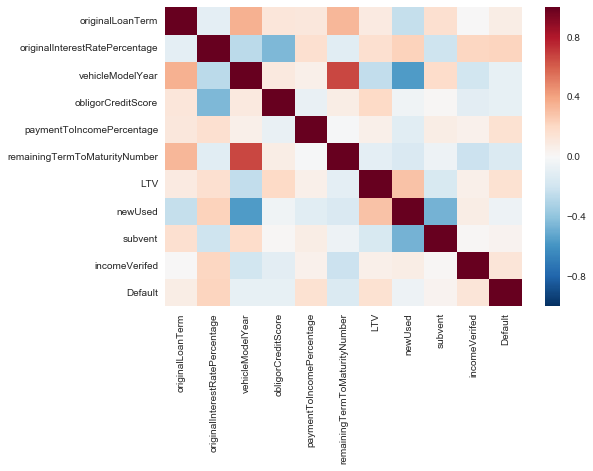

In [116]:
sb.heatmap(train.corr())

In [ ]:
bins = {
    'LTV':[0,100, 110, 120],
    'originalLoanTerm':[0,70],
    'originalInterestRatePercentage':[0,15,20,25],
    'subvented':[0],#have to do != here
    'vehicleNewUsedCode':[0,1,2],
    'vehicleModelYear':[2012],
    'obligorCreditScore':[550,650,750],
    'obligorIncomeVerificationLevelCode':[3,5],
    'obligorEmploymentVerificationCode':[3],
    'paymentToIncomePercentage':[.1],
    'remainingTermToMaturityNumber':[24,48,72],
    'totalActualAmountPaid':[0]
}
train['obligorEmploymentVerificationCode'].unique()